In [1]:
import os
import sys
# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io
from scipy import signal
import math
import cv2

# generate hadamard matrices
from scipy.linalg import hadamard    
# working with images stuff
from skimage.transform import resize
from PIL import Image


In [15]:
# Load Data
pixel1 = np.loadtxt('head1.csv', delimiter=',')
pixel1 = pixel1.reshape(1024,1280,10)
pixel2 = np.loadtxt('head2.csv', delimiter=',')
pixel2 = pixel2.reshape(1024,1280,10)
pixel3 = np.loadtxt('head3.csv', delimiter=',')
pixel3 = pixel3.reshape(1024,1280,10)

specks = np.loadtxt('speckles.csv', delimiter=',')
specks = specks.reshape(720,1280,10)


In [16]:
A = np.loadtxt('speckles.csv', delimiter=',')
A = A.reshape(16,16,256)
A = A.reshape(256,256)

b = np.loadtxt('scene.csv', delimiter=',')
b = b.reshape(1,256)

b_sub = np.loadtxt('black_subtract.csv', delimiter=',')
b_sub = b_sub.reshape(1,256)

In [17]:
for i in range(256):
    b[:,i] = b[:,i].copy() - b_sub[:,i].copy()
    

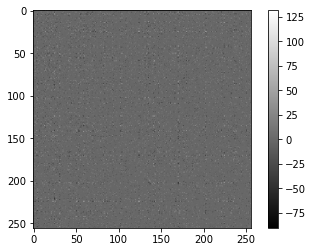

In [22]:
x = np.linalg.inv(np.transpose(A)*A)*np.transpose(A)*b
plt.imshow(x, cmap='gray')
plt.colorbar()

In [24]:
# Only 5 images taken LOL
single_pix1 = np.zeros((5))
single_pix2 = single_pix1.copy()
single_pix3 = single_pix1.copy()
# single_pix2 = np.zeros((pixel2.shape[2]))
# single_pix3 = np.zeros((pixel3.shape[2]))

for i in range(single_pix1.shape[0]):
    single_pix1[i] = np.mean(pixel1[:,:,i])
    single_pix2[i] = np.mean(pixel2[:,:,i])
    single_pix3[i] = np.mean(pixel3[:,:,i])

In [26]:
single_pix1

array([101.19257431, 106.99196396,  98.85253448,  97.73035278,
       103.25790634])

In [34]:
specks[:,:,0]

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.]])

(1024, 1024)
(1024,)


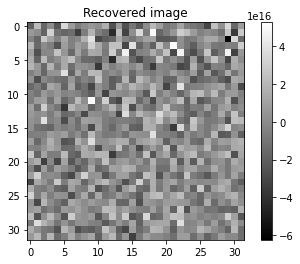

In [61]:
# %%  Load image & generate object
# load image, convert to grayscale, store as array (matrix)
ground_obj = pixel2[:,:,0]
# Choose new size (don't go higher than 128x128 or Hadamard will kill you)
px = 32
# Resize image to smaller size for simulation
test_obj = resize(ground_obj,(px,px))

# #%% Generate measurement patterns using a Hadamard matrix. 
# ## Each row is a 2D pattern (after reshaping)
# # H = hadamard(px**2)   # Complete Hadamard matrix (+1s and -1s)
H = specks[:,:,0].copy()
H = resize(H,(px**2,px**2))

# #%% Generate measurements simulating H+ and H- 
# ## (as if patterns were generated on a DMD)
# Mplus = Hplus@test_obj.flatten()    #Project H+ patterns, store intensity
# Mminus = Hminus@test_obj.flatten()  #Project H- patterns, store intensity
# M = Mplus - Mminus                  #Substract values (H+ - H-)
Mplus = test_obj.flatten()
Mminus = 1-test_obj.flatten()
M = Mplus - Mminus

print(H.shape)
print(M.shape)

#%% Recover objects
# Inversion from measurements (solve the eq. systems with/without noise)
recovery = np.linalg.solve(H,M)
# Reshape from vector into image           
recovery = recovery.reshape((px,px));

#%% Show the results
plt.figure()
plt.imshow(recovery,cmap='gray')
plt.axis('on')
plt.title('Recovered image')
plt.colorbar()
plt.show()

(1024, 1024)
(1024,)


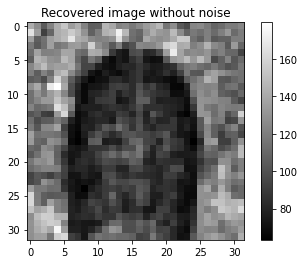

In [58]:
# %%  Load image & generate object
# load image, convert to grayscale, store as array (matrix)
ground_obj = pixel2[:,:,0]
# Choose new size (don't go higher than 128x128 or Hadamard will kill you)
px = 32
# Resize image to smaller size for simulation
test_obj = resize(ground_obj,(px,px))

#%% Generate measurement patterns using a Hadamard matrix. 
## Each row is a 2D pattern (after reshaping)
H = hadamard(px**2)   # Complete Hadamard matrix (+1s and -1s)
Hplus = (H+1)/2       # H+ Hadamard matrix (1s and 0s)
Hminus = (1-H)/2      # H- Hadamard matrix (0s and 1s)

#%% Generate measurements simulating H+ and H- 
## (as if patterns were generated on a DMD)
Mplus = Hplus@test_obj.flatten()    #Project H+ patterns, store intensity
Mminus = Hminus@test_obj.flatten()  #Project H- patterns, store intensity
M = Mplus - Mminus                  #Substract values (H+ - H-)

print(H.shape)
print(M.shape)
#%% Recover objects
# Inversion from measurements (solve the eq. systems with/without noise)
recovery = np.linalg.solve(H,M)
# Reshape from vector into image           
recovery = recovery.reshape((px,px));

#%% Show the results
#Show recovery without noise
plt.figure()
plt.imshow(recovery,cmap='gray')
plt.axis('on')
plt.title('Recovered image without noise')
plt.colorbar()
plt.show()